<a href="https://colab.research.google.com/github/tether007/Pytorch/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device="cuda" if torch.cuda.is_available else "cpu"

2.6.0+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
from torchvision import datasets
from torchvision import transforms

train_data=datasets.MNIST(
    root="data",
    train=True,
    transform=transforms.ToTensor(),
    download=True,
    target_transform=None
)

test_data=datasets.MNIST(
    root="data",
    train=False,
    transform=transforms.ToTensor(),
    download=True,
    target_transform=None
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 55.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.75MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.50MB/s]


## 6. Visualize at least 5 different samples of the MNIST training dataset.

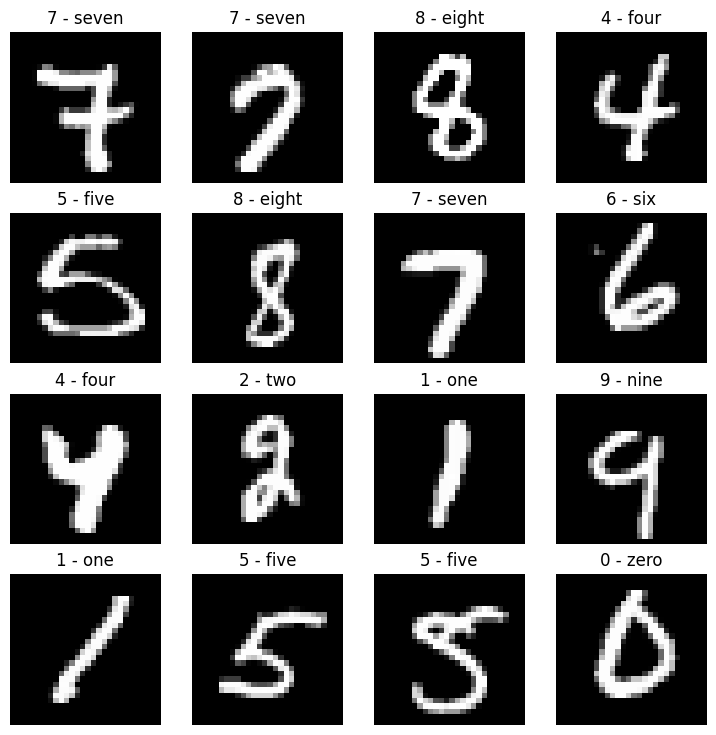

In [5]:
#plot more Image
import matplotlib.pyplot as plt
class_names=train_data.classes
torch.manual_seed=42
fig=plt.figure(figsize=(9,9))
row,col=4,4
for i in range(1,row*col+1):

  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(row,col,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)



## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [6]:
from torch.utils.data import DataLoader

#HP
BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader=DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

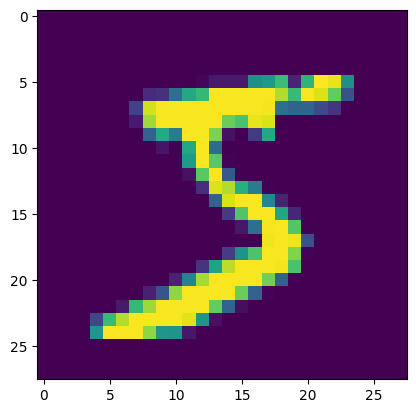

In [14]:
image,label=train_data[0]
plt.imshow(image.squeeze())

In [20]:
from torch import nn
class tinyvgg(nn.Module):
  """"
  tinyVGG replica
  """""
  def __init__(self,input_shape,hidden_shape,output_shape):
    super().__init__()
    self.block1=nn.Sequential(
        nn.Conv2d(input_shape,hidden_shape,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_shape,hidden_shape,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.block2=nn.Sequential(
        nn.Conv2d(hidden_shape,hidden_shape,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_shape,hidden_shape,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=7*7,out_features=output_shape)
    )


  def forward(self,x):
    x=self.block1(x)
    print(x.shape)
    x=self.block2(x)
    print(x.shape)
    x=self.classifier(x)
    print(x.shape)
    return x

torch.manual_seed=42
MNSITmodel=tinyvgg(input_shape=1,hidden_shape=10,output_shape=len(class_names))
MNSITmodel

tinyvgg(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=49, out_features=10, bias=True)
  )
)

In [21]:
MNSITmodel(image)

torch.Size([10, 14, 14])
torch.Size([10, 7, 7])
torch.Size([10, 10])


tensor([[ 0.0128, -0.0315, -0.0859, -0.0594, -0.0625,  0.1284, -0.0028,  0.0041,
          0.1238, -0.0808],
        [ 0.0311,  0.0267, -0.1715, -0.0277, -0.0184,  0.0437,  0.0043,  0.0982,
          0.0777, -0.0334],
        [ 0.0276,  0.0093, -0.1441, -0.0351, -0.0283,  0.0674,  0.0016,  0.0715,
          0.0927, -0.0436],
        [ 0.0128, -0.0315, -0.0859, -0.0594, -0.0625,  0.1284, -0.0028,  0.0041,
          0.1238, -0.0808],
        [ 0.0128, -0.0315, -0.0859, -0.0594, -0.0625,  0.1284, -0.0028,  0.0041,
          0.1238, -0.0808],
        [ 0.0128, -0.0315, -0.0859, -0.0594, -0.0625,  0.1284, -0.0028,  0.0041,
          0.1238, -0.0808],
        [ 0.0313,  0.0286, -0.1739, -0.0264, -0.0149,  0.0422,  0.0027,  0.1006,
          0.0830, -0.0312],
        [ 0.0128, -0.0315, -0.0859, -0.0594, -0.0625,  0.1284, -0.0028,  0.0041,
          0.1238, -0.0808],
        [ 0.0341,  0.0390, -0.1919, -0.0194, -0.0083,  0.0223,  0.0035,  0.1209,
          0.0721, -0.0216],
        [ 0.0347,  

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [7]:
def train_step(Model:nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  train_loss,train_acc=0,0


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?